## Machine Learning - desarrollo del modelo

In [53]:
# Se impotan las librerias necesarias
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()
from matplotlib import cm
from sklearn import tree

In [2]:
# En esta parte desabilito los "Warning" que pudieran salir
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)  

## Se procede a realizar el EDA (Exploracion y Analisis de Datos)

In [6]:
#se importa el archivo hospitalizaciones_tarin.csv para su revision y analisis
train_df=pd.read_csv('Datasets\hospitalizaciones_train.csv', encoding='utf-8')

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

In [10]:
train_df.isnull().sum()

Available Extra Rooms in Hospital    0
Department                           0
Ward_Facility_Code                   0
doctor_name                          0
staff_available                      0
patientid                            0
Age                                  0
gender                               0
Type of Admission                    0
Severity of Illness                  0
health_conditions                    0
Visitors with Patient                0
Insurance                            0
Admission_Deposit                    0
Stay (in days)                       0
dtype: int64

In [8]:
train_df.sample(10)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
363772,3,gynecology,F,Dr Sarah,7,26883,11-20,Female,Trauma,Moderate,High Blood Pressure,4,No,6788.599231,9
133948,2,gynecology,B,Dr Sarah,6,86762,11-20,Female,Trauma,Extreme,High Blood Pressure,2,Yes,7835.548167,7
189836,5,gynecology,F,Dr Olivia,6,77212,31-40,Female,Trauma,Moderate,Other,2,Yes,4453.949087,9
158669,3,gynecology,D,Dr Olivia,6,39582,21-30,Female,Emergency,Moderate,None,4,Yes,4304.389416,8
101856,3,gynecology,B,Dr Sarah,1,107921,11-20,Female,Trauma,Moderate,Asthama,4,Yes,4504.488334,9
249671,4,gynecology,B,Dr Sarah,9,23230,21-30,Female,Emergency,Minor,Asthama,3,Yes,3909.437219,8
373521,4,gynecology,F,Dr Olivia,1,93588,31-40,Female,Emergency,Moderate,None,14,No,3919.612260,9
57694,4,gynecology,B,Dr Olivia,6,4231,31-40,Female,Trauma,Moderate,None,4,Yes,4621.186307,7
369094,3,gynecology,F,Dr Olivia,4,26388,31-40,Female,Emergency,Moderate,Other,6,Yes,3655.606036,9
196972,4,gynecology,D,Dr Nathan,3,28122,21-30,Female,Urgent,Extreme,None,6,Yes,4446.621509,9


In [9]:
# Se importa el archivo hospitalizaciones_test.csv para luego generarle las mismas transformaciones
test_df=pd.read_csv('Datasets\hospitalizaciones_test.csv', encoding='utf-8')
test_df.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit
0,3,gynecology,F,Dr Olivia,10,2858,21-30,Female,Trauma,Moderate,Other,2,No,4749.640225
1,2,TB & Chest disease,E,Dr John,4,65657,51-60,Female,Trauma,Moderate,Asthama,2,Yes,4122.261324
2,2,radiotherapy,E,Dr John,7,45598,51-60,Other,Trauma,Moderate,None,3,No,5459.067882
3,2,gynecology,F,Dr Olivia,1,31132,21-30,Female,Trauma,Moderate,None,2,Yes,3987.033318
4,2,anesthesia,A,Dr John,7,125021,51-60,Female,Trauma,Extreme,Diabetes,2,No,4770.789695


## Se realizan tranformaciones y analisis a los datos de train

In [11]:
# Se agrega una columna "estadia" como resultado de la binarizacion de la columna "Stay (in days)"
train_df['estadia'] = np.where(train_df['Stay (in days)']>8,1,0)

In [12]:
# Se elimina columna "Stay (in days)"
train_df.drop(columns='Stay (in days)', inplace=True)

In [13]:
# Se convierte columnas categoricas a numericas
le = preprocessing.LabelEncoder()
train_df['Insurance'] = le.fit_transform(train_df['Insurance'])
train_df['health_conditions'] = le.fit_transform(train_df['health_conditions'])
train_df['Type of Admission'] = le.fit_transform(train_df['Type of Admission'])
train_df['gender'] = le.fit_transform(train_df['gender'])
train_df['doctor_name'] = le.fit_transform(train_df['doctor_name'])
train_df['Ward_Facility_Code'] = le.fit_transform(train_df['Ward_Facility_Code'])
train_df['Department']=le.fit_transform(train_df['Department'])


In [14]:
# Se convierte columnas categoricas ordinales en numericas 
enc = OrdinalEncoder()
train_df['Age'] = enc.fit_transform(train_df[['Age']])
train_df['Severity of Illness'] = enc.fit_transform(train_df[['Severity of Illness']])


In [15]:
# Se define la funcion para graficar un mapa de calor de las correlaciones
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(20,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

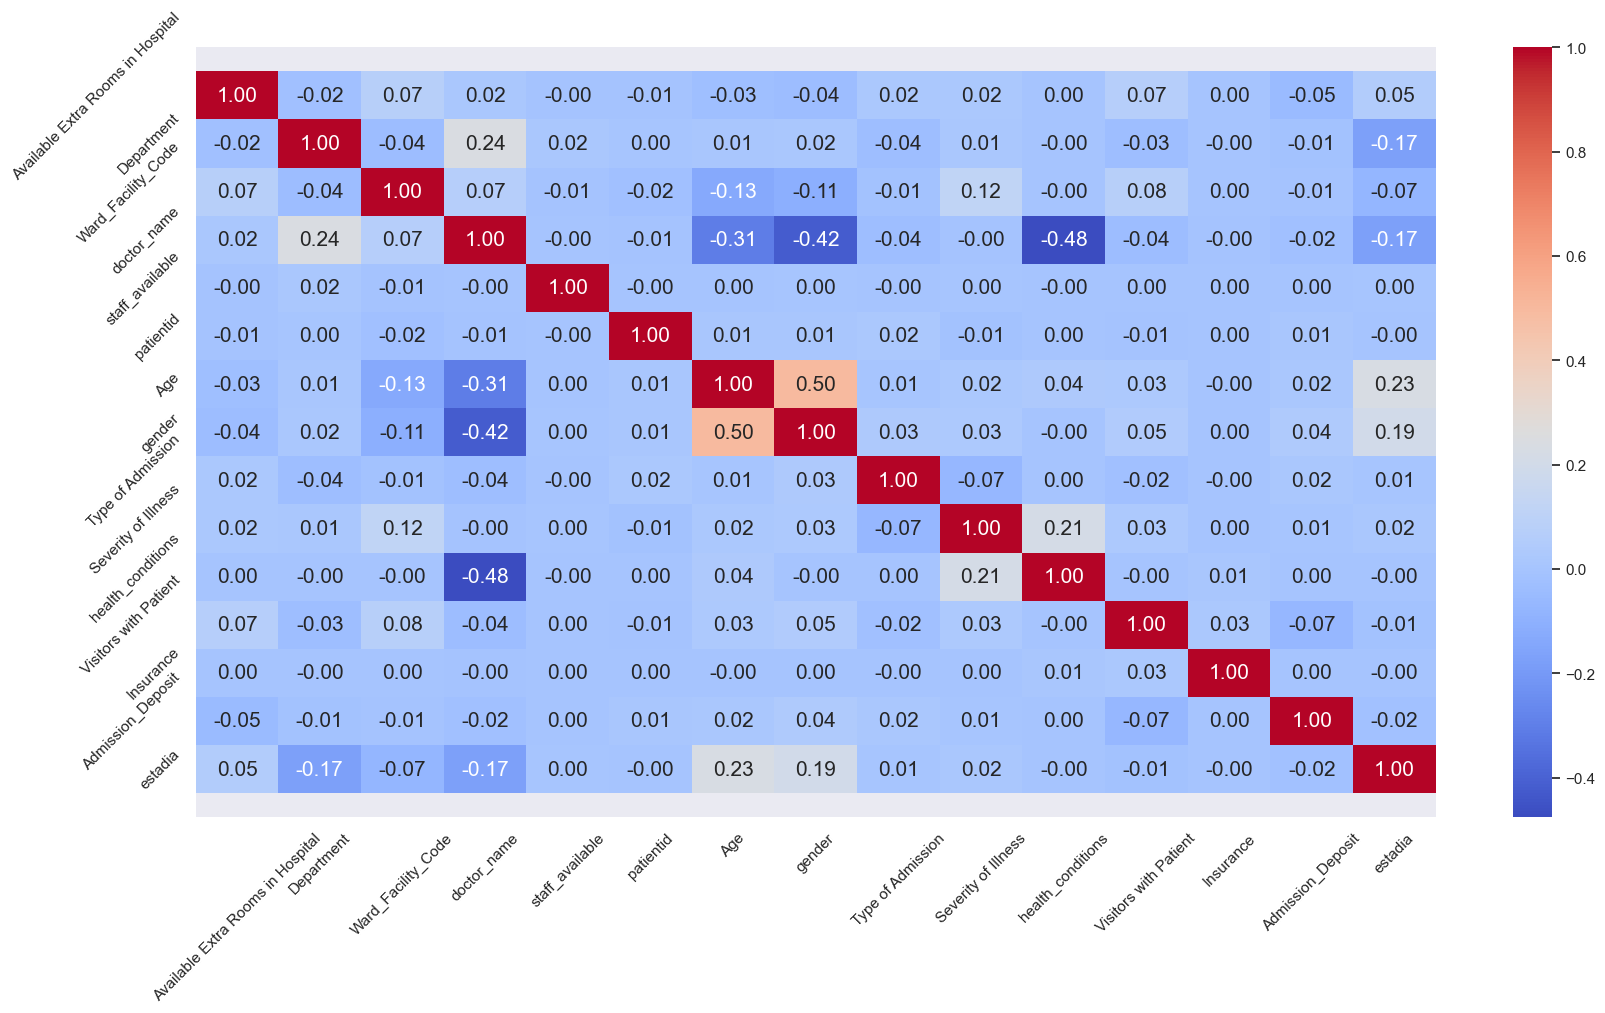

In [16]:
# Se asigna una variable la correlacion del dataframe de entrenamiento y se procede a graficarla
corr = train_df.corr()
plot_corre_heatmap(corr)

Se considera que hay ciertas columnas que no mantienen correlacion

In [17]:
# Se eliminan las columnas que se consideran innecasarias por tener correlacion baja o nula
train_df.drop(columns=['staff_available', 'patientid', 'Visitors with Patient','Insurance','health_conditions'], inplace=True)

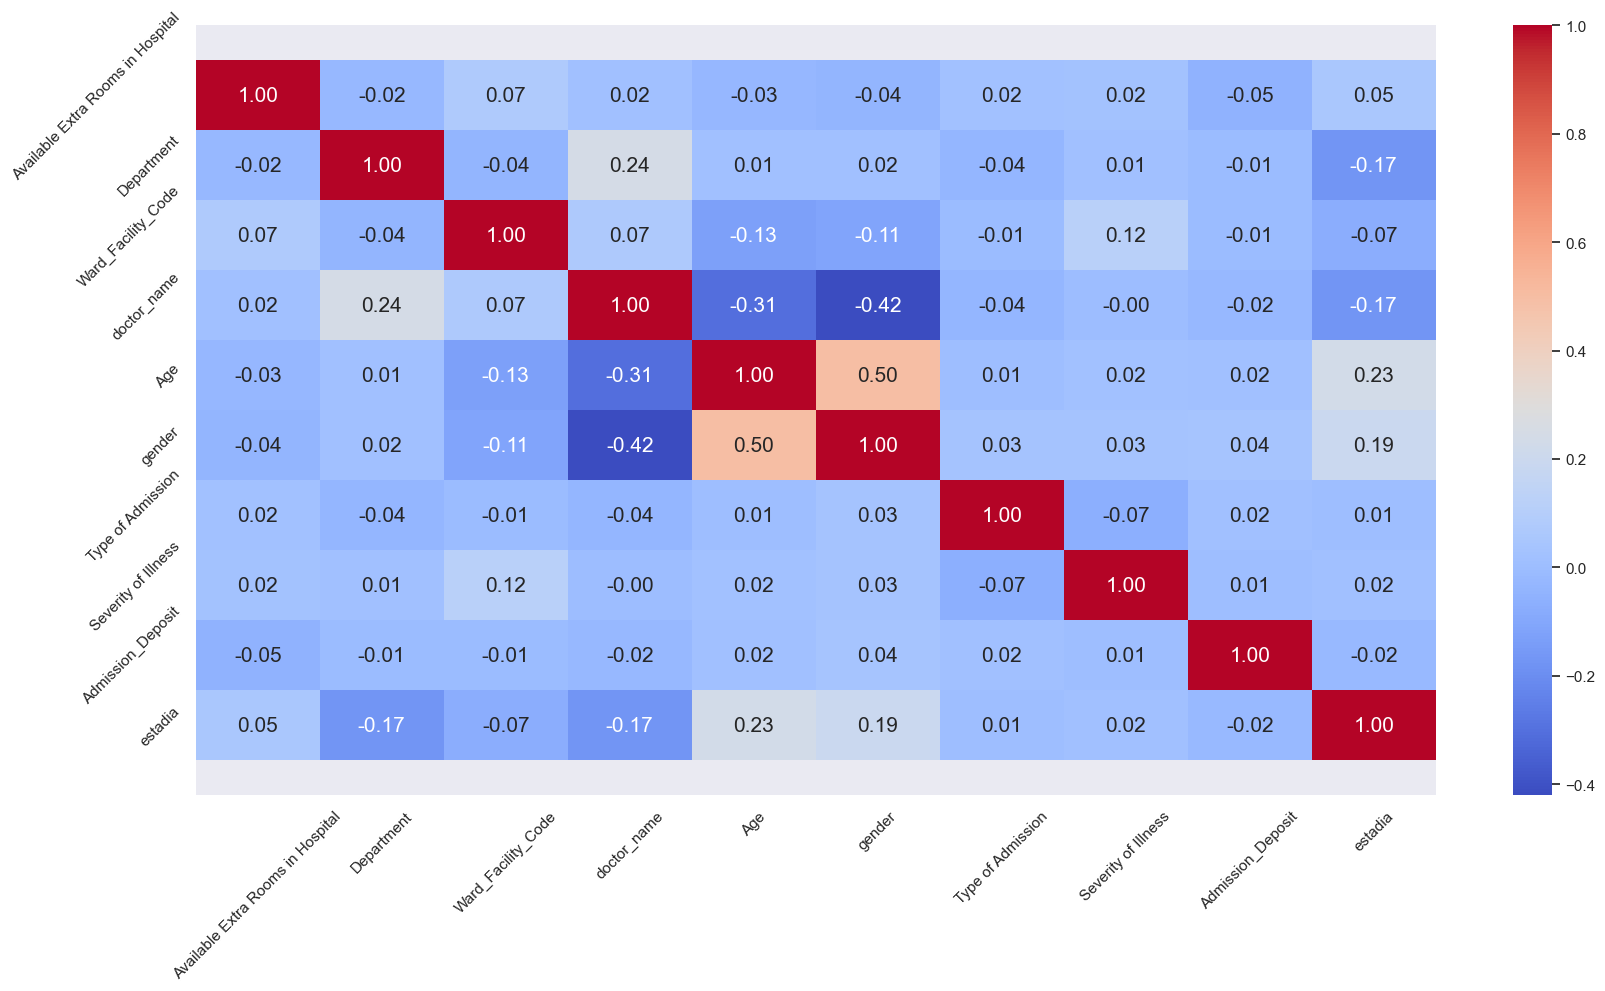

In [18]:
# Se vuelve a graficar el mapa de calor de las correlaciones por si al eliminar columnas generaba un cambio
corr = train_df.corr()
plot_corre_heatmap(corr)

Elijo este ultimo mapa de calor por el cual tendre consideraciona a las columnas

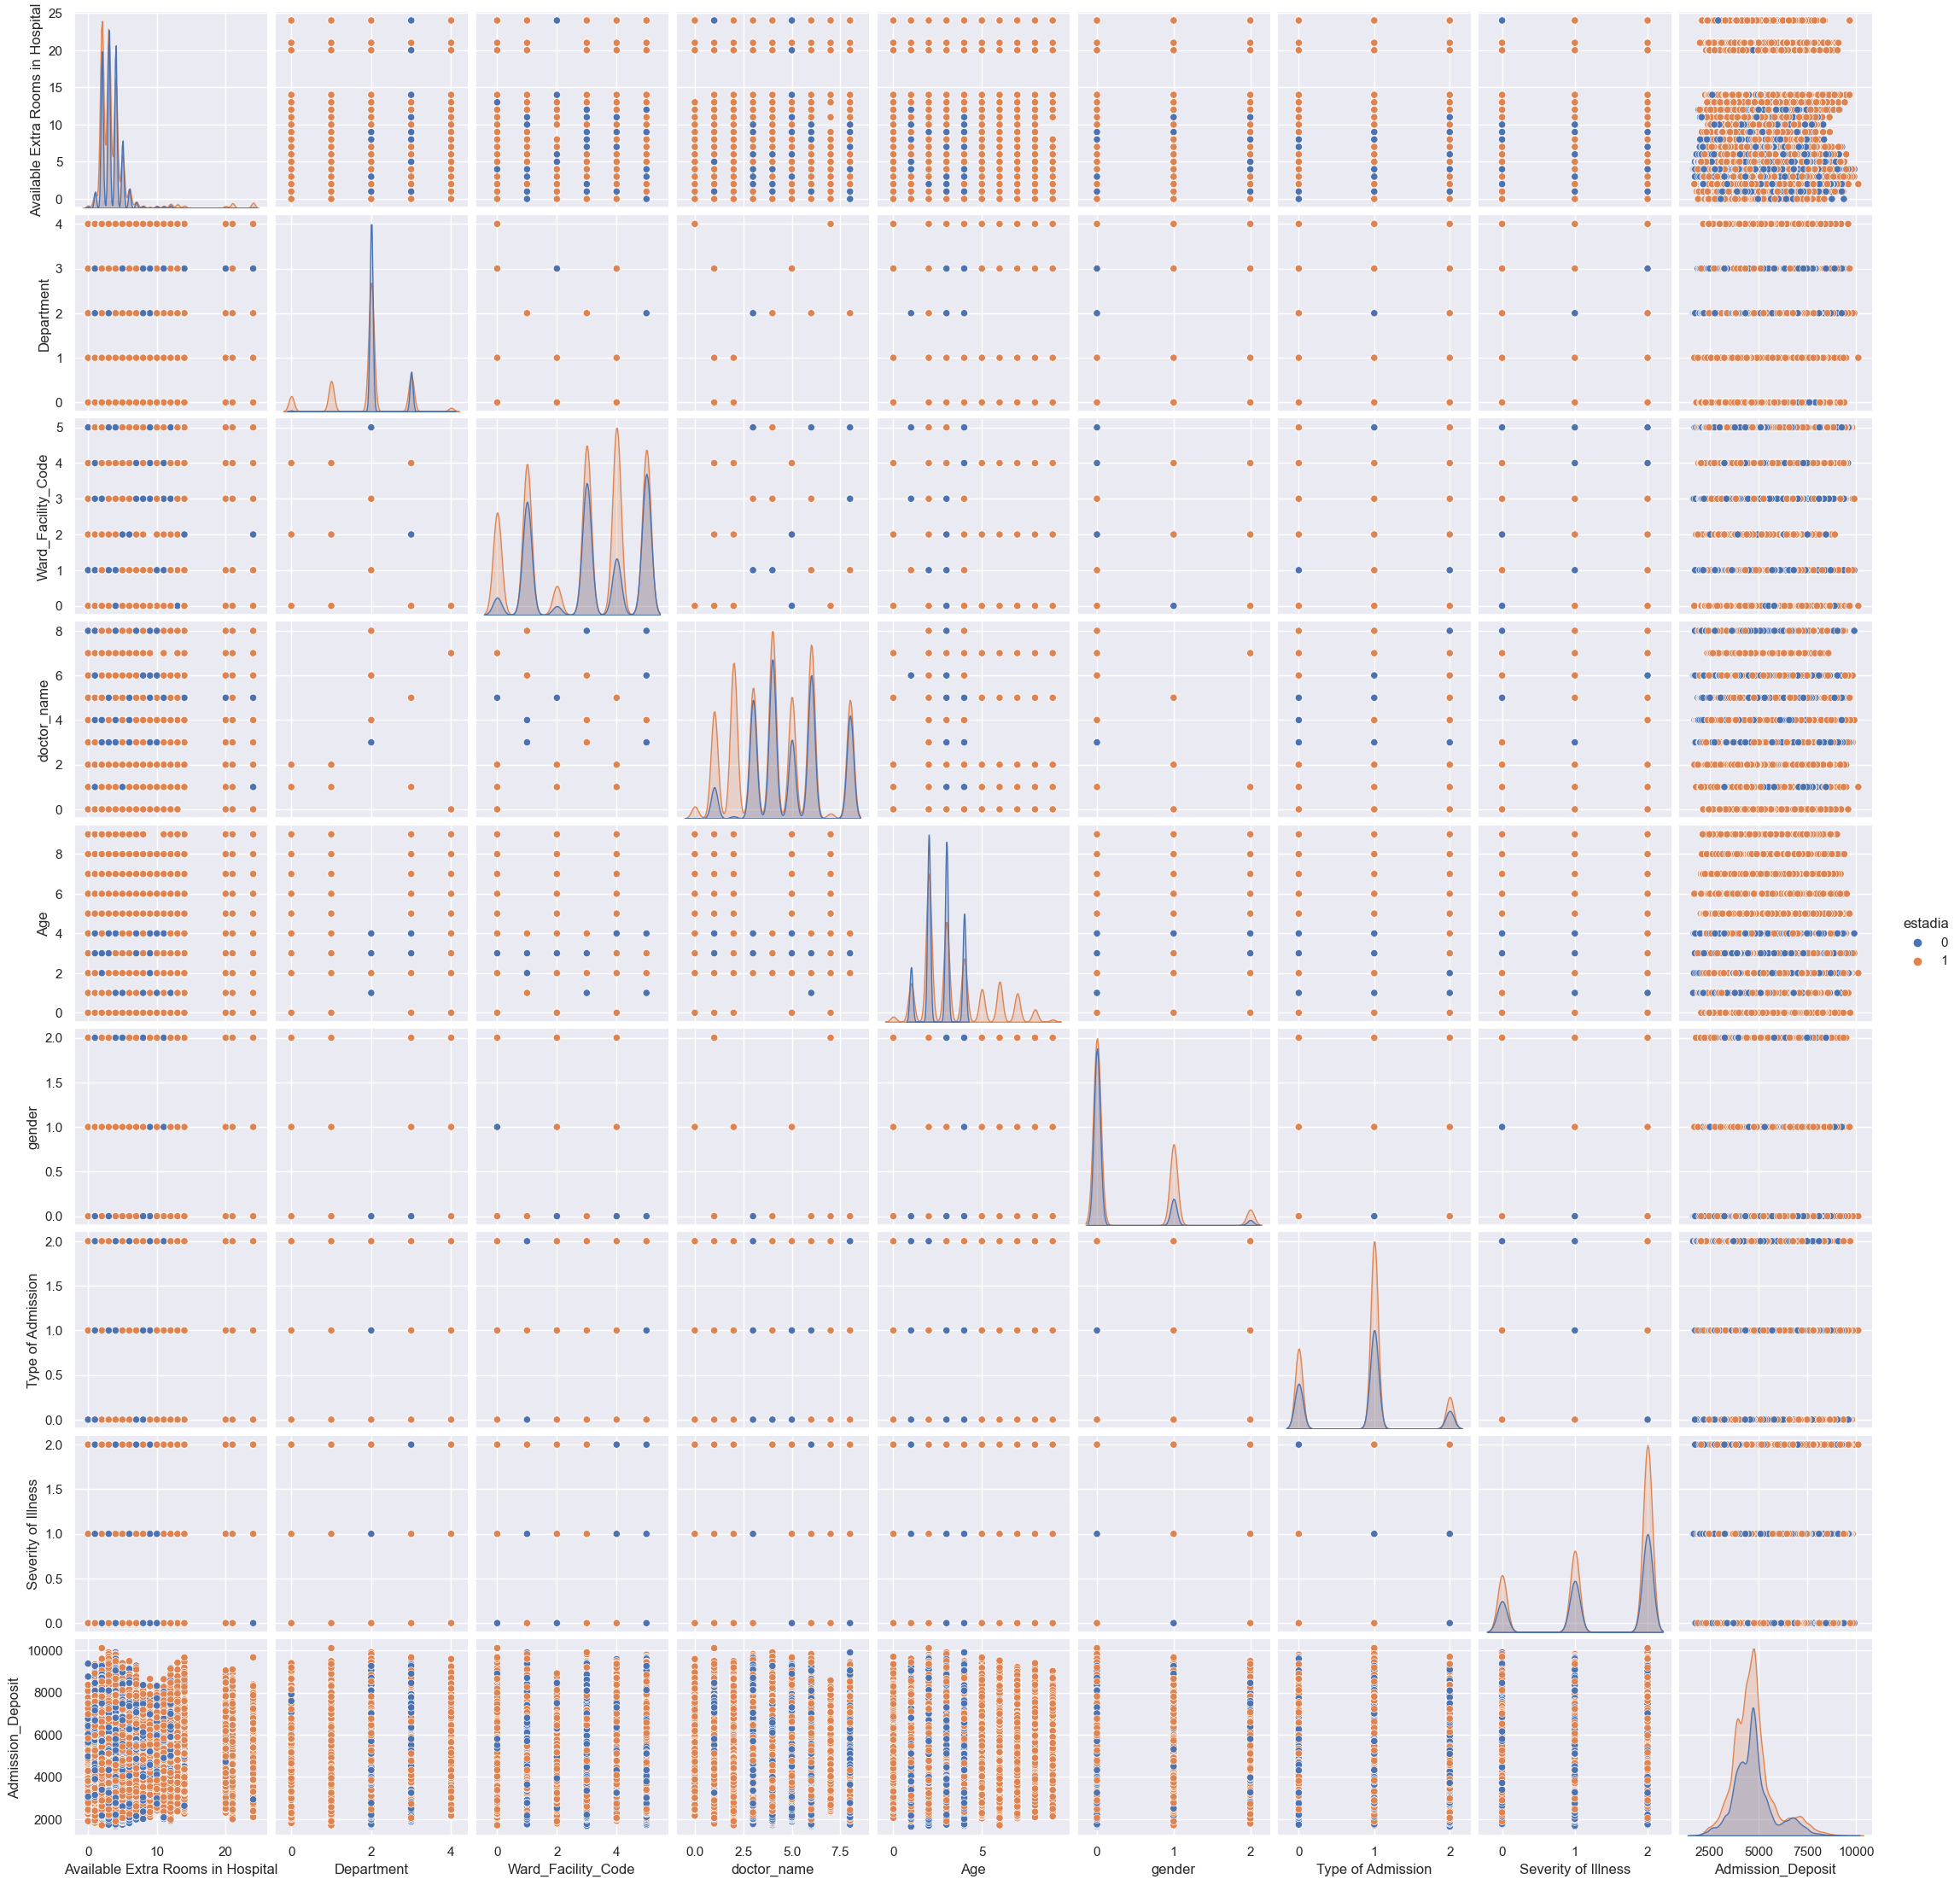

In [23]:
sns.pairplot(train_df, hue = 'estadia')
plt.show()

## Se apican las mismas transformaciones al dataframe test

In [19]:
# Se convierte columnas categoricas a numericas
le = preprocessing.LabelEncoder()
test_df['Department']=le.fit_transform(test_df['Department'])   
test_df['Insurance'] = le.fit_transform(test_df['Insurance'])
test_df['health_conditions'] = le.fit_transform(test_df['health_conditions'])
test_df['Type of Admission'] = le.fit_transform(test_df['Type of Admission'])
test_df['gender'] = le.fit_transform(test_df['gender'])
test_df['doctor_name'] = le.fit_transform(test_df['doctor_name'])
test_df['Ward_Facility_Code'] = le.fit_transform(test_df['Ward_Facility_Code'])

In [20]:
# Se convierte columnas categoricas ordinales en numericas
enc = OrdinalEncoder()
test_df['Age'] = enc.fit_transform(test_df[['Age']])
test_df['Severity of Illness'] = enc.fit_transform(test_df[['Severity of Illness']])

In [21]:
# Se eliminan las columnas que se consideran innecasarias como train_df
test_df.drop(columns=['staff_available', 'patientid', 'Visitors with Patient','Insurance','health_conditions',], inplace=True)

In [22]:
# Se verifica que todo este de acuerdo a los pasos aplicados
test_df.sample(5)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,Age,gender,Type of Admission,Severity of Illness,Admission_Deposit
22806,2,2,3,6,2.0,0,0,1.0,4961.100205
65462,2,3,4,1,3.0,2,0,1.0,4778.643147
57446,3,1,4,1,5.0,2,1,1.0,4330.872636
64085,2,2,1,4,3.0,0,1,2.0,3265.421664
28666,4,1,4,2,3.0,1,1,0.0,4500.917429


Se elige el modelo supervisado ''Arbol de decision'', ya que considerando que me encuento buscando una un modelo de clasificacion con varios datos categoricos, coincide con el tipo de proceso que necesto realizar. Ademas,Los modelos de ''Arboles de decisión'' crean reglas de decisión sobre las características para producir predicciones, resultando útil en este caso. 

## Se comienza el desarrollo del Arbol

In [24]:
# Se establece X e y para para proceder con el modelo de Arbol
X=train_df.iloc[:,0:8]
y=train_df.iloc[:,9]

In [25]:
# se importa libreria necesaria
from sklearn.model_selection import train_test_split

In [26]:
# Realizo partición de los datos datos, dejo un 30% para testear

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(287000, 8) (287000,) (123000, 8) (123000,)


In [27]:
# Se importan las librerias necesarias
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

In [28]:
# Se instancia un objeto de la clase DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 4, random_state = 42) 

In [29]:
# Entrenamos el modelo

clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [30]:
# Exploramos algunas de las características del modelo entrenado. 
print(clf.classes_)
print(clf.n_classes_)
print(clf.max_features_)
print(clf.feature_importances_)

[0 1]
2
8
[0.04186062 0.27252652 0.         0.         0.68561286 0.
 0.         0.        ]


Al observar que las features que tienen relevancia se procede a trabajar solo con ellas en un nuevo Arbol

In [55]:
# Se establece X e y para para proceder con el modelo de Arbol
X=train_df.iloc[:,[0,1,4]]
y=train_df.iloc[:,9]

In [56]:
# Realizo partición de los datos, dejo un 30% para testear

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(287000, 3) (287000,) (123000, 3) (123000,)


In [57]:
# Se instancia un objeto de la clase DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 4, random_state = 42) 

In [58]:
# Entrenamos el modelo

clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [59]:
# Predecimos
y_pred = clf.predict(X_test)
y_train_pred=clf.predict(X_train)

In [60]:
# Exploramos algunas de las características del modelo entrenado. 
print(clf.classes_)
print(clf.n_classes_)
print(clf.max_features_)
print(clf.feature_importances_)

[0 1]
2
3
[0.04186062 0.27252652 0.68561286]


In [61]:
# Exploramos el nivel de accuracy, recall y f1score
print("accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))
print("F1score:", metrics.f1_score(y_test,y_pred))

accuracy:  0.684219512195122
Recall:  0.9953751486092784
F1score: 0.7968768793896004


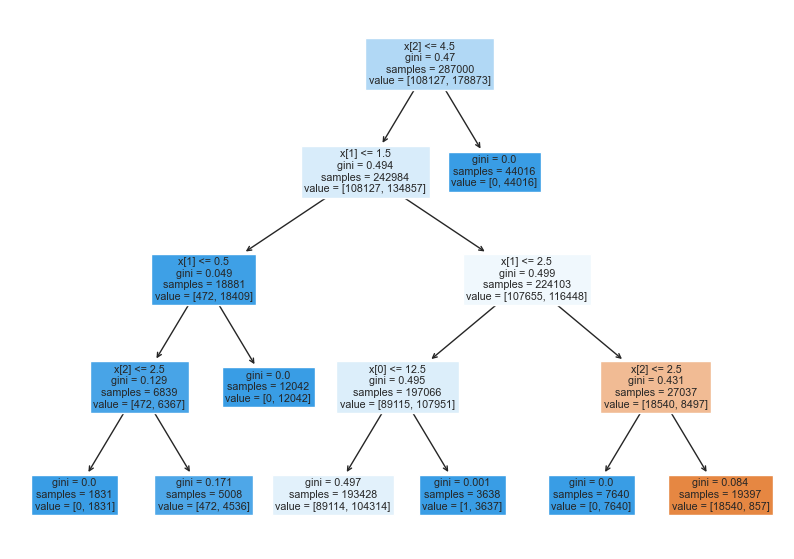

In [62]:
plt.figure(figsize = (10,7))
tree.plot_tree(clf, filled = True)
plt.show()

## Se prepara todo para hacer el grafico y proceder al analisis de profundidad del Arbol

In [40]:
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,8,1)

for profundidad in profundidades:
    clf = DecisionTreeClassifier(max_depth=profundidad)
    tree_scores = cross_validate(clf, X, y, cv=3, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

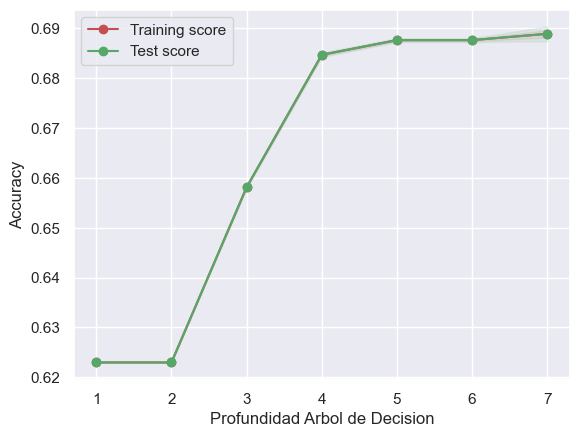

In [41]:
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")

plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

### Se elige el nivel 4 para el Arbol

## Se procede con la matriz de confucion para revalidar los datos

In [42]:
# Se importa libreria necesaria
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [43]:
# Se crean las variables 
matrix = confusion_matrix(y_train, y_train_pred)
matrix_2 = confusion_matrix(y_test, y_pred)


In [44]:
# Se le aplica el metodo
cm_display = ConfusionMatrixDisplay(matrix)
cm_display_2 = ConfusionMatrixDisplay(matrix_2)

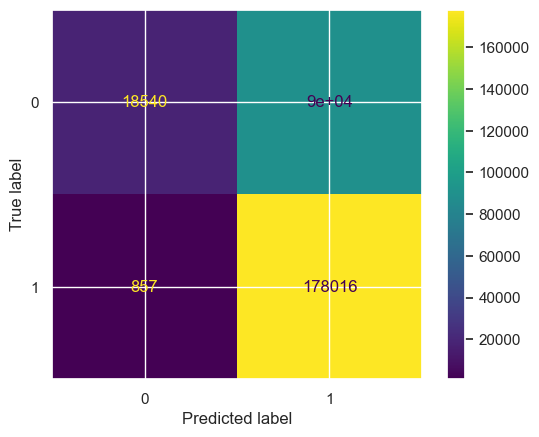

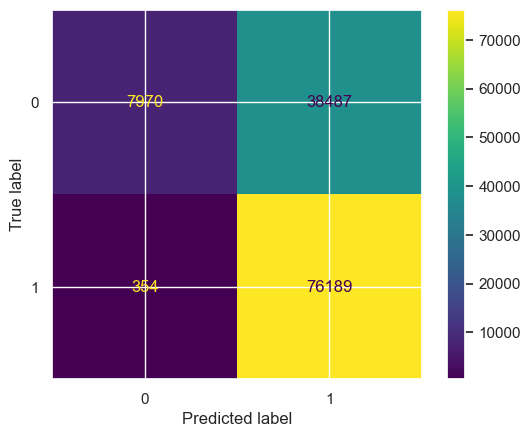

In [45]:
# Se grafican las matrices
cm_display.plot()
plt.show()
cm_display_2.plot()
plt.show()

## Se procede a hacer la prediccion con el archivo test

In [46]:
# Se establece X1 del dataframe test
X1=test_df.iloc[:,[0,1,4]]  

In [63]:
# Se instancia un objeto de la clase DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 4, random_state = 42) 

In [64]:
# Entrenamos el modelo nuevamente para poder hacer el paso siguiente

clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [65]:
# Predecimos en base a los datos de test
y_pred_t=clf.predict(X1)

In [66]:
# Convertimos el array dataframe
df_pred = pd.DataFrame(y_pred_t)

In [67]:
# Nombramos la columna
df_pred = df_pred.rename(columns={0:'pred'})


In [68]:
# Exportamos a csv
df_pred.to_csv('ArgumedoHector.csv', index=False)

Este archivo .csv queda con una columna conteniendo la predicción del dataframe test